<a href="https://colab.research.google.com/github/Shiwei-Chen/SWOOSH/blob/main/Interview_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT ESSENTIAL PACKAGE#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dataurl = "https://raw.githubusercontent.com/Shiwei-Chen/SWOOSH/main/data.csv"

df = pd.read_csv(dataurl)
df.head(10)

,month,quantity,product_real_price,service_score,real_disp_pers_inc,product_stores,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,5-Feb,40415305,0.564579,2207,9190.1,686.9054,0,1,0,0,0,0,0,0,0,0,0,0
1,5-Mar,52544001,0.560363,1864,9183.5,688.2814,0,0,1,0,0,0,0,0,0,0,0,0
2,5-Apr,56089039,0.578420,2061,9206.1,687.4706,0,0,0,1,0,0,0,0,0,0,0,0
3,5-May,50559014,0.596748,2025,9253.6,689.1815,0,0,0,0,1,0,0,0,0,0,0,0
4,5-Jun,53225857,0.595003,2068,9299.9,692.9923,0,0,0,0,0,1,0,0,0,0,0,0
5,5-Jul,49423136,0.589750,2054,9322.9,692.3075,0,0,0,0,0,0,1,0,0,0,0,0
6,5-Aug,56152897,0.585170,2095,9328.3,692.6835,0,0,0,0,0,0,0,1,0,0,0,0
7,5-Sep,54249937,0.585492,2151,9273.7,693.2031,0,0,0,0,0,0,0,0,1,0,0,0
8,5-Oct,43868678,0.566283,2065,9300.1,696.4139,0,0,0,0,0,0,0,0,0,1,0,0
9,5-Nov,44498684,0.573497,2147,9365.8,696.7292,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
#Check data types
df.dtypes

month                  object
quantity                int64
product_real_price    float64
service_score           int64
real_disp_pers_inc    float64
product_stores        float64
M01                     int64
M02                     int64
M03                     int64
M04                     int64
M05                     int64
M06                     int64
M07                     int64
M08                     int64
M09                     int64
M10                     int64
M11                     int64
M12                     int64
dtype: object

In [5]:
#Check if null value exists
df.isnull().sum().any()

False

In [6]:
# ,'log_price','log_score','log_income'
# ,'product_real_price','service_score','real_disp_pers_inc'
dflog = df

dflog['log_quantity'] = np.log(dflog['quantity'])
dflog['log_price'] = np.log(dflog['product_real_price'])
dflog['log_score'] = np.log(dflog['service_score'])
dflog['log_income'] = np.log(dflog['real_disp_pers_inc'])

dflog.head(10)

,month,quantity,product_real_price,service_score,real_disp_pers_inc,product_stores,M01,M02,M03,M04,...,M07,M08,M09,M10,M11,M12,log_quantity,log_price,log_score,log_income
0,5-Feb,40415305,0.564579,2207,9190.1,686.9054,0,1,0,0,...,0,0,0,0,0,0,17.514719,-0.571675,7.699389,9.125882
1,5-Mar,52544001,0.560363,1864,9183.5,688.2814,0,0,1,0,...,0,0,0,0,0,0,17.777161,-0.579170,7.530480,9.125164
2,5-Apr,56089039,0.578420,2061,9206.1,687.4706,0,0,0,1,...,0,0,0,0,0,0,17.842451,-0.547455,7.630947,9.127622
3,5-May,50559014,0.596748,2025,9253.6,689.1815,0,0,0,0,...,0,0,0,0,0,0,17.738652,-0.516260,7.613325,9.132768
4,5-Jun,53225857,0.595003,2068,9299.9,692.9923,0,0,0,0,...,0,0,0,0,0,0,17.790055,-0.519189,7.634337,9.137759
5,5-Jul,49423136,0.589750,2054,9322.9,692.3075,0,0,0,0,...,1,0,0,0,0,0,17.715929,-0.528057,7.627544,9.140229
6,5-Aug,56152897,0.585170,2095,9328.3,692.6835,0,0,0,0,...,0,1,0,0,0,0,17.843589,-0.535853,7.647309,9.140808
7,5-Sep,54249937,0.585492,2151,9273.7,693.2031,0,0,0,0,...,0,0,1,0,0,0,17.809112,-0.535303,7.673688,9.134938
8,5-Oct,43868678,0.566283,2065,9300.1,696.4139,0,0,0,0,...,0,0,0,1,0,0,17.596711,-0.568661,7.632886,9.137780
9,5-Nov,44498684,0.573497,2147,9365.8,696.7292,0,0,0,0,...,0,0,0,0,1,0,17.610970,-0.556003,7.671827,9.144820


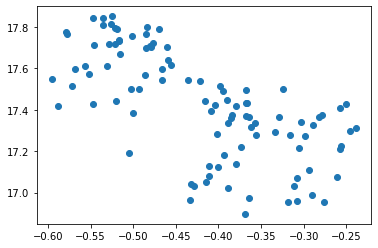

In [7]:
plt.plot(dflog['log_price'],dflog['log_quantity'],"o")

In [8]:
from sklearn import linear_model
import statsmodels.api as sm

Xprice = dflog['log_price']
Yprice = dflog['log_quantity']

In [9]:
Xprice = sm.add_constant(Xprice) # adding a constant
 
model = sm.OLS(Yprice, Xprice).fit()
predictions = model.predict(Xprice) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     80.69
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.95e-14
Time:                        12:28:52   Log-Likelihood:                 23.984
No. Observations:                 100   AIC:                            -43.97
Df Residuals:                      98   BIC:                            -38.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6703      0.086    193.835      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**2. From this single linear regression model, we can see that the coefficient of log(product real price) is -1.80, which means when log real price add by 1 unit, log quantity will decrease by 1.8 units. From the business perspective, the higher the pricing, the lower the demand quatity. The result is reasonable because it matches with economic demand theory of normal goods.**

  **The R-square of this single linear regression model is 0.446, which means there near 45% of the data can be explained by the model. The accuracy of this model has opportunity to be improved.** 

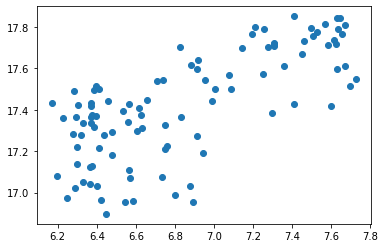

In [25]:
plt.plot(dflog['log_score'],dflog['log_quantity'],"o")

In [26]:
Xscore = dflog['log_score']
Yscore = dflog['log_quantity']

Xscore = sm.add_constant(Xscore) 
 
model = sm.OLS(Yscore, Xscore).fit()
predictions = model.predict(Xscore) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.65e-17
Time:                        13:21:44   Log-Likelihood:                 29.721
No. Observations:                 100   AIC:                            -55.44
Df Residuals:                      98   BIC:                            -50.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8188      0.258     57.438      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


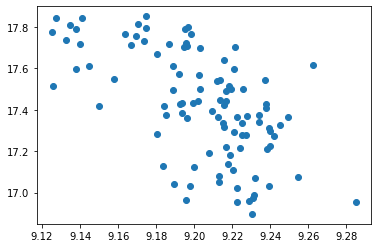

In [10]:
plt.plot(dflog['log_income'],dflog['log_quantity'],"o")

In [11]:
Xincome = dflog['log_income']
Yincome = dflog['log_quantity']

Xincome = sm.add_constant(Xincome) 
 
model = sm.OLS(Yincome, Xincome).fit()
predictions = model.predict(Xincome) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     53.74
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.59e-11
Time:                        13:01:25   Log-Likelihood:                 15.811
No. Observations:                 100   AIC:                            -27.62
Df Residuals:                      98   BIC:                            -22.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.6854      5.901     10.283      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**3. Statisically, the coefficient of -4.7 means 1 unit increase in log(real_disp_pers_inc) results in 4.7 units of log(quantity) decrease. From business perspective, it means if personal disposable incomes are higher, the product quantity sales will be lower. This is a really interesting result.**

**4. I can not accept the upper three models because their R-square are relatively low and there will definitely be a better model using this dataset**

  **Below is a multilinear regression model which will be more accurate than the upper two single linear ones**


In [27]:
# Question 1 Model 1
X1 = dflog[['log_price','log_score','product_stores','log_income']]
Y1 = dflog['log_quantity']

X1 = sm.add_constant(X1) 

model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     42.24
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           2.60e-20
Time:                        13:24:54   Log-Likelihood:                 45.050
No. Observations:                 100   AIC:                            -80.10
Df Residuals:                      95   BIC:                            -67.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.0635      7.621      2.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**From the upper multi-linear regression model, we can see that the R-sqaure shows that the model is way more accurate. However, there is one variable log_income's P-value higher than 0.05. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected. Therefore we have to remove this variable and redo the model**

In [28]:
X1 = dflog[['log_price','log_score','product_stores']]
Y1 = dflog['log_quantity']

X1 = sm.add_constant(X1) 

model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     55.48
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.84e-21
Time:                        13:26:05   Log-Likelihood:                 44.235
No. Observations:                 100   AIC:                            -80.47
Df Residuals:                      96   BIC:                            -70.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.6031      0.851     13.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
regr1 = linear_model.LinearRegression()
regr1.fit(X1, Y1)

print('Intercept: \n', regr1.intercept_)
print('Coefficients: \n', regr1.coef_)

Intercept: 
 11.603121098036237
Coefficients: 
 [0.         1.14179511 0.3173159  0.00618479]


**The upper model is the answer to Question 1, with a R-sqaure of 0.634.**

**IN CONCLUSION, THE FORMULA RESULT FOR MODEL 1 IS:**

# **log(quantity) = 1.1418 * log(product_real_price) + 0.3173 * log(service_score) + 0.0062 * product_stores + 11.6**

In [ ]:
# Question 5 Model 2 MO4 Added
X2 = dflog[['log_price','log_score','product_stores','log_income','M04']]
Y2 = dflog['log_quantity']

X2 = sm.add_constant(X2) 

model = sm.OLS(Y2, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     36.14
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.76e-20
Time:                        17:16:49   Log-Likelihood:                 47.570
No. Observations:                 100   AIC:                            -83.14
Df Residuals:                      94   BIC:                            -67.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.3600      7.478      2.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


  **The addition of M04 raised the model's accuracy by increasing R-square.**

**6. Statisically, the coefficient of 1.38 means 1 unit increase in log(product real price) results in 1.38 units of log(quantity) increase.**

**7. I can not comment on log(real_disp_pers_inc) because this variable is still not significant with a P-value of 0.242, which is larger than 0.05.**

**Q6&7 From demand theory, the lower the price is, the higher the demand should be. However, the coeffeicient of this model shows that the higher the price is, the higher the demand. This is a very interesting result, because the coefficient of log(price) violate the demand theory.**

**This result might caused by the interaction between each independent variable and the high P-value of log(price) can prove that this variable is not the most significant variable that influence the outcome of the model.**

**8. 1 unit higher in average number of stores selling this product can result in 0.006 units of log(quantity) = around 1 unit of quantity increase.**

In [ ]:
#Q9
X3 = dflog[['log_price','log_score','product_stores','log_income','M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12']]
Y3 = dflog['log_quantity']

X3 = sm.add_constant(X3) 

model = sm.OLS(Y3, X3).fit()
predictions = model.predict(X3) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     87.54
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.17e-44
Time:                        17:51:27   Log-Likelihood:                 134.52
No. Observations:                 100   AIC:                            -237.0
Df Residuals:                      84   BIC:                            -195.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.1527      3.168      2.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**9. When all Mxx are included as independent variables, the model's R square reaches 93%**

**10. The coefficient of M08 shows that August is the highest selling month for this product. M04 - M08 own relatively higher coefficient means this product is highly probablly a summer item, maybe a Tee or a shorts.**


**11. The model with all Mxx included is with a nearly perfect R-sqaure of 0.929, which means 93% of the data can be explained by this model. This model can be totally accepted because it shows seasonality can optimize this model's degree of fitting**